![Banner challenge](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner%20de%20Challenge%20parte%202.png)

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

El análisis de evasión de clientes (también conocido como "churn analysis") es un problema clásico de clasificación en el campo del aprendizaje automático. El objetivo es construir un modelo que pueda predecir qué clientes tienen más probabilidades de cancelar sus servicios en un futuro cercano.

En esencia, estás buscando crear un modelo que aprenda a identificar patrones y características en los datos de los clientes que se correlacionan con la probabilidad de abandono. Estos patrones pueden incluir información demográfica, historial de uso del servicio, interacciones con el servicio al cliente, entre otros.

Para lograr esto, deberás seguir un proceso que incluye:

* Recopilación y preparación de datos: Obtener los datos relevantes de los clientes y limpiarlos para eliminar errores o inconsistencias.

* Ingeniería de características: Crear nuevas características a partir de los datos existentes que puedan ser útiles para el modelo.

* Selección de modelo: Elegir un algoritmo de clasificación adecuado para el problema, como regresión logística, árboles de decisión, bosques aleatorios o máquinas de vectores de soporte.

* Entrenamiento del modelo: Utilizar los datos preparados para entrenar el modelo y ajustar sus parámetros.

* Evaluación del modelo: Medir el rendimiento del modelo utilizando métricas como precisión, exhaustividad, F1-score y AUC-ROC.

* Implementación del modelo: Integrar el modelo en un sistema que pueda predecir la probabilidad de abandono de los clientes en tiempo real.

El proceso de preparación de datos y selección de modelos debe seguir este flujo:

Conocer tus datos:
--

* Tipo de variables: Identificar si son categóricas (nominales, ordinales, binarias) o numéricas (discretas, continuas).
* Distribución: Analizar cómo se distribuyen los valores de cada variable (histogramas, boxplots, etc.).
Valores faltantes: Identificar si hay valores faltantes y cómo manejarlos.
* Valores atípicos: Detectar valores atípicos que puedan afectar el rendimiento del modelo.
* Relaciones: Explorar las relaciones entre las variables (correlaciones, gráficos de dispersión, etc.).

Tratamiento de datos:
--
* En función de los datos: Aplicar las técnicas de preprocesamiento adecuadas para cada tipo de variable y para abordar los problemas identificados en el paso anterior (escalado, transformación, codificación, imputación de valores faltantes, etc.).

* En función de los modelos: Considerar los requisitos y supuestos de los modelos que planeas utilizar. Algunos modelos son más sensibles a la escala de las variables, a la presencia de valores atípicos o a la multicolinealidad.

Selección de modelos:
--
* En función del problema: Elegir modelos que sean adecuados para el tipo de problema que estás resolviendo (clasificación, regresión, clustering, etc.).

* En función de los datos: Considerar las características de tus datos al elegir un modelo. Algunos modelos funcionan mejor con datos lineales, mientras que otros son más adecuados para datos no lineales.

* En función de los objetivos: Tener en cuenta tus objetivos al elegir un modelo. ¿Quieres maximizar la precisión? ¿Quieres obtener un modelo interpretable? ¿Quieres un modelo que sea robusto a valores atípicos?
En resumen, el proceso de preparación de datos y selección de modelos es iterativo y depende de tus datos, tus modelos y tus objetivos. ¡No hay una receta única!

#💾 **Extracción de datos tratados.**

In [1]:
import pandas as pd
import requests
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando Json

url1 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/TelecomX_Data%20(1).json"
response = requests.get(url1)
data = response.json()
dfjson = pd.DataFrame(data)
dfjson.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
dfjson_normalizado = json_normalize(data)
dfjson_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
#Importar en formato CSV
dfjson_normalizado.to_csv('TelecomX_Data.csv', index=False)

# **Preparación de los Datos.**

---

![Banner preparación datos](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner_%20Secci%C3%B3n_%20preparaci%C3%B3n.png)

---

##**Extracción del Archivo Tratado.**

In [5]:
url2 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/TelecomX_Data.csv"
df = pd.read_csv(url2)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
#Convertir columna account.Charges.Total en tipo float64.
df['account.Charges.Total'] = df['account.Charges.Total'].str.replace(',', '.',regex=True)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [7]:
#Agregar columna de Cargo_Diario.
#Creo columna Cuentas_diarias.
df['Cuentas_diarias'] = df['account.Charges.Monthly']/30

---

##**Verificación de la Proporción de Cancelación (Churn)**


Cuadro de frecuencia absoluta y relativa de 'Cancelación'.


,Frecuencia,Proporción (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


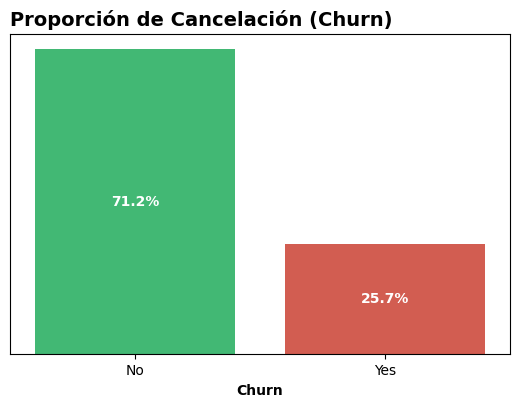

In [8]:
#Código para verificar proporción de cancelación.
churn_frecuencia = df['Churn'].value_counts()
churn_proporcion = df['Churn'].value_counts(normalize=True)*100

#Tabla combinada.
df_churn = pd.DataFrame(
    {'Frecuencia': churn_frecuencia, 'Proporción (%)': churn_proporcion.round(2)}
)

print(f"Cuadro de frecuencia absoluta y relativa de 'Cancelación'.")
display(df_churn)
print(f"\n")

#Gráfico de barras.
colores = ['#2ecc71', '#e74c3c']

fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x='Churn', hue='Churn', data=df, palette=colores, legend=False, ax=ax)

# Título y etiquetas
ax.set_title('Proporción de Cancelación (Churn)', fontsize=14, loc='left', fontweight='bold')
ax.set_xlabel('Churn', fontweight='bold')
ax.set_ylabel('')  # sin título en eje Y

# Quitar ticks del eje Y
ax.set_yticks([])

# Mostrar porcentajes dentro de las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    porcentaje = f'{100 * height / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        porcentaje,
        ha='center', va='center', color='white', fontweight='bold'
    )

# Dejar margen inferior y recortar el resto
plt.subplots_adjust(top=1, bottom=0.2, left=0, right=1)

plt.show()
print()


---

##**Tratando Valores Nulos.**

In [9]:
#Eliminamos los datos nulos en la variable dependiente.
df = df.dropna(subset=['Churn'])

In [10]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


>**Nota:**
Eliminamos datos nulos en la columna de `Charges.Totales` dado que 11 elementos no son representativos y consideramos que su incidencia es mínima.

In [11]:
#Código para borrar datos nulos.
df = df.dropna(subset=['account.Charges.Total'])

In [12]:
#Verificamos datos nulos en df.
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [13]:
#Verificación del los metadatos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

---

##**Eliminación de Columnas Irrelevantes.**

>📌 **Nota:**  
>  "📑 Tomamos como referencia los resultados del análisis de correlación de variables ya antes realizado donde la variable `Cuentas_diarias` es igual a cargo_mensual / 30, no aporta información adicional al modelo. "

In [14]:
#Código para borrar columna customerID Cuentas_diarias.
df = df.drop(columns=['customerID','Cuentas_diarias'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

---

**Eliminando datos redundantes.**

In [16]:
#Para eliminar redundancia en los datos.
df_clean = df.copy()

In [17]:
df_clean.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [18]:
col_agrupar = ['internet.OnlineSecurity', 'internet.OnlineBackup',
               'internet.DeviceProtection', 'internet.TechSupport',
               'internet.StreamingTV', 'internet.StreamingMovies']

for col in col_agrupar:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

In [19]:
col_categoricas = ['Churn', 'customer.gender',
                   'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                   'internet.OnlineSecurity', 'internet.OnlineBackup',
                   'internet.DeviceProtection', 'internet.TechSupport',
                   'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
                    'account.PaperlessBilling', 'account.PaymentMethod']

In [20]:
##Prueba si cargo_total es ≈ antigüedad × cargo_mensual (posible eliminar en modelos lineales)
prueba_variable_ctotal = pd.DataFrame(df_clean[['customer.tenure','account.Charges.Monthly', 'account.Charges.Total']]).copy()
prueba_variable_ctotal['prueba'] = (prueba_variable_ctotal['customer.tenure'] * prueba_variable_ctotal['account.Charges.Monthly']).round(2)

In [21]:
prueba_variable_ctotal['prueba'].describe()

,prueba
count,7032.000000
mean,2283.147248
std,2264.703327
min,18.800000
25%,397.800000
50%,1394.575000
75%,3791.250000
max,8550.000000


>📌 **Nota:**  
>  "📑 Comparo con datos EDA.

Comparación cargo_total vs. prueba (tenure × cargo_mensual)
Medias y medianas casi iguales.

* `cargo_total` media = 2279.7

* `prueba` media = 2283.1
  👉 Prácticamente idénticas.

* `cargo_total` mediana = 1394.55

* `prueba` mediana = 1394.57
👉 Son iguales al centésimo.

* **Desviaciones estándar y rangos muy similares.**

* `cargo_total` std = 2266.79

* `prueba` std = 2264.70
👉 Diferencia mínima.

* **Máximos y cuartiles son casi idénticos (ej: Q1 ≈ 398 vs 397.8).**
  Pequeñas diferencias.
  
  En cargo_total aparecen valores como 0 (probablemente clientes sin facturación inicial, descuentos o redondeos).

  En prueba el cálculo no llega exactamente a esos casos especiales (por eso el mínimo es 18.8 en lugar de 0).
  👉 Esto confirma que cargo_total incluye ajustes reales del negocio (cargos, descuentos, periodos de gracia), no solo la multiplicación matemática.

✅ **Conclusión práctica.**

* `cargo_total` ≈ `antigüedad` × `cargo_mensual` en casi todos los clientes.

  Las diferencias pequeñas provienen de reglas de negocio (descuentos, cargos iniciales, promociones).

  **Implicación para el modelado:**

  * En modelos lineales (ej. regresión logística) → conviene eliminar cargo_total para evitar colinealidad con antigüedad y cargo_mensual.

  * En árboles de decisión → puede quedarse, pero no aporta información nueva, solo reparte importancia entre variables.

##**Encoding**

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

**Get_dummies para análisis preliminar del nuevo dataset.**

In [23]:
df_encoding_dummies = pd.get_dummies(df_clean, columns=col_categoricas, drop_first=True)
df_encoding_dummies.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [24]:
df_encoding_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   account.Charges.Monthly                        7032 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Churn_Yes                                      7032 non-null   bool   
 5   customer.gender_Male                           7032 non-null   bool   
 6   customer.Partner_Yes                           7032 non-null   bool   
 7   customer.Dependents_Yes                        7032 non-null   bool   
 8   phone.PhoneService_Yes                         7032 non-null   bool   
 9   phone.MultipleLines_No phone service           7032 non-n

##**Análisis de Correlación.**

In [25]:
corr = df_encoding_dummies.corr()

In [26]:
target_var = 'Churn_Yes'
corr_target = df_encoding_dummies.corr()[target_var].sort_values(ascending=False)
print(corr_target)

Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
account.Charges.Monthly                          0.192858
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partner_Yes                            -0.149982
customer.Depen

##**Heatmap**

**Correlación entre variable Dependiente e Independientes.**
--

**Escala de correlación.**

* 0.30 – 0.50 (o –0.30 a –0.50) → relación moderada/fuerte. Muy útil para explicar churn.

* 0.10 – 0.29 (o –0.10 a –0.29) → relación débil a moderada. Puede aportar, pero con menos peso.

* \<0.10 (o –0.10) → relación muy débil o nula. Son candidatas a eliminar salvo que sean estratégicas (ej: telefonía).

👉 Ideal: variables con correlación ≥0.30 o ≤–0.30 con churn.
Las de 0.10–0.29 pueden quedarse si aportan en combinación con otras.

> **Nota:**
* Para relación con churn → miramos el signo.

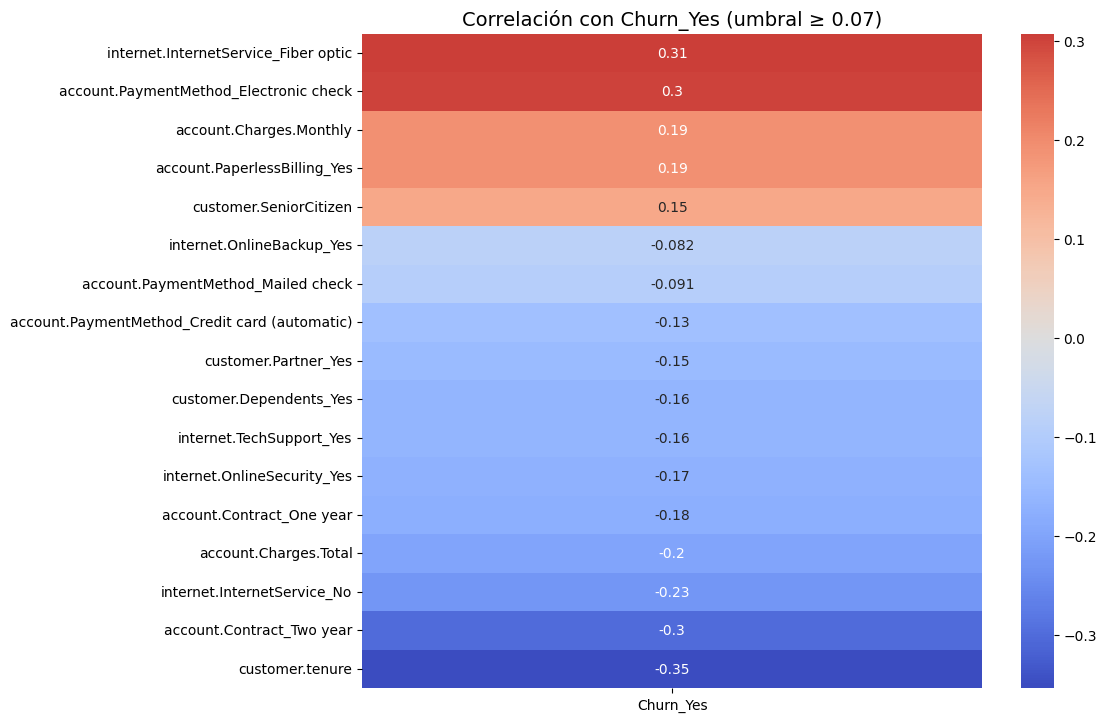

In [29]:

# Variable objetivo
target_var = 'Churn_Yes'

# Calcular matriz de correlación
corr = df_encoding_dummies.corr()

# Filtrar por correlación mínima con el target (0.07)
corr_target = corr[target_var][abs(corr[target_var]) >= 0.07]

# Quitar el target de la lista para no graficarlo consigo mismo
corr_target = corr_target.drop(target_var)

# Ordenar por mayor correlación
corr_target = corr_target.sort_values(ascending=False)

# Crear un dataframe filtrado solo con las variables relevantes
corr_filtrada = corr.loc[corr_target.index]

# Graficar heatmap
plt.figure(figsize=(10, len(corr_target) * 0.5))  # alto dinámico según cantidad de variables
sns.heatmap(corr_filtrada[[target_var]], annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlación con {target_var} (umbral ≥ 0.07)", fontsize=14)
plt.show()

**Correlación entre Variables Independientes.**
--

**Niveles de correlación a tener en cuenta.**

> *  \>0.80 o <–0.80 → demasiada correlación → son redundantes → conviene dejar solo una en modelos lineales.

> * 0.50 – 0.79 → relación moderada → revisa si tiene sentido que estén juntas (ej: cargo_total vs tenure).

> * \<0.50 → aceptable, significa que cada variable aporta algo distinto.

👉 Ideal: correlaciones menores a 0.50 entre independientes → así no se pisan entre sí.

> **Nota:**
* Para colinealidad → miramos valor absoluto.

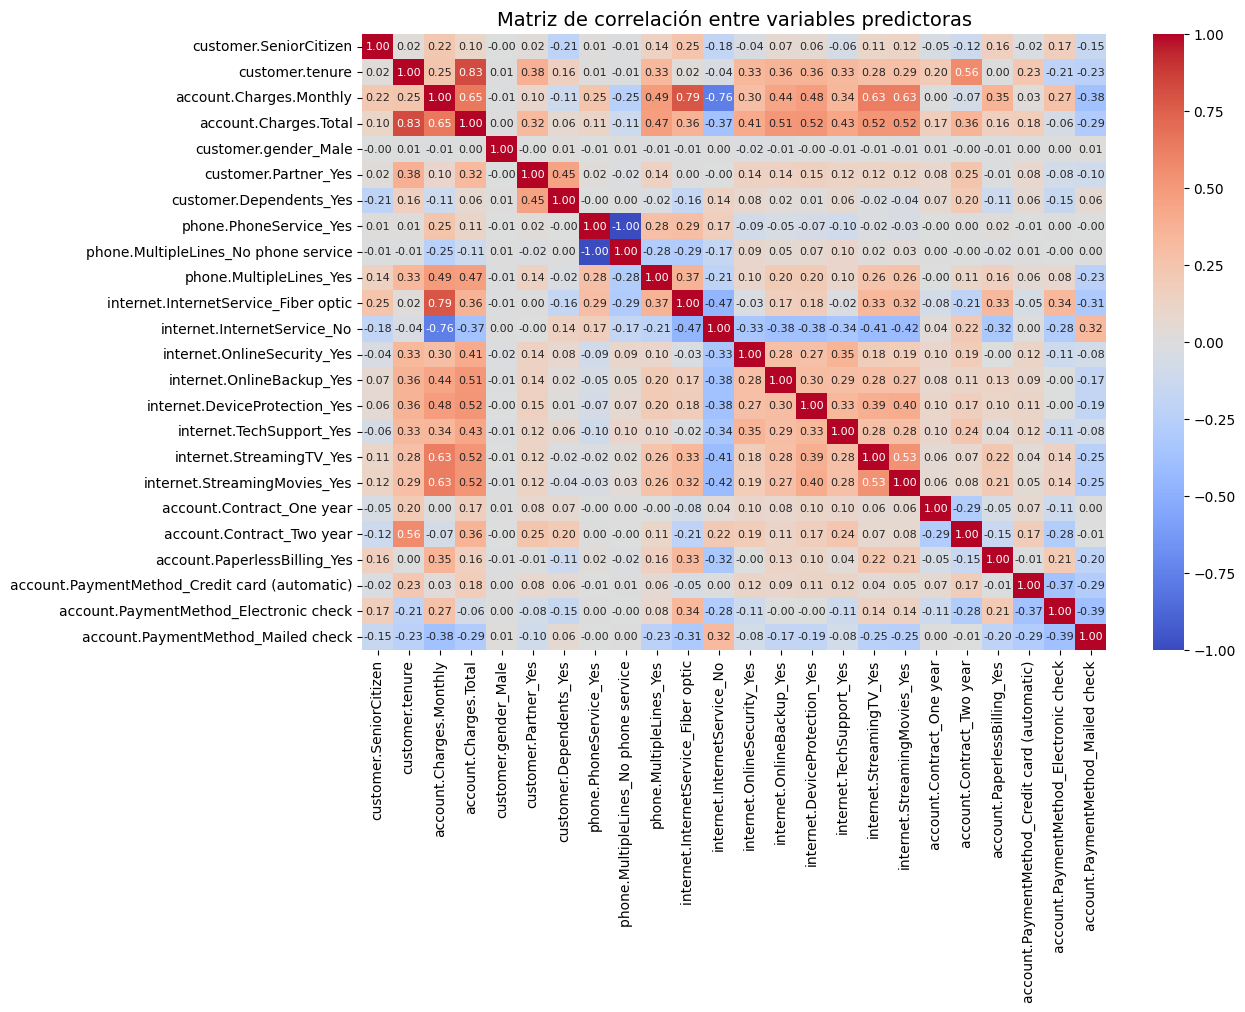

In [31]:
# Matriz de correlación solo para variables predictoras (quitamos el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr_matrix = predictoras.corr()

# Graficar heatmap con coeficientes
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,           # Mostrar los números
    fmt=".2f",            # Formato de 2 decimales
    annot_kws={"size": 8} # Tamaño del texto de los coeficientes
)
plt.title("Matriz de correlación entre variables predictoras", fontsize=14)
plt.show()


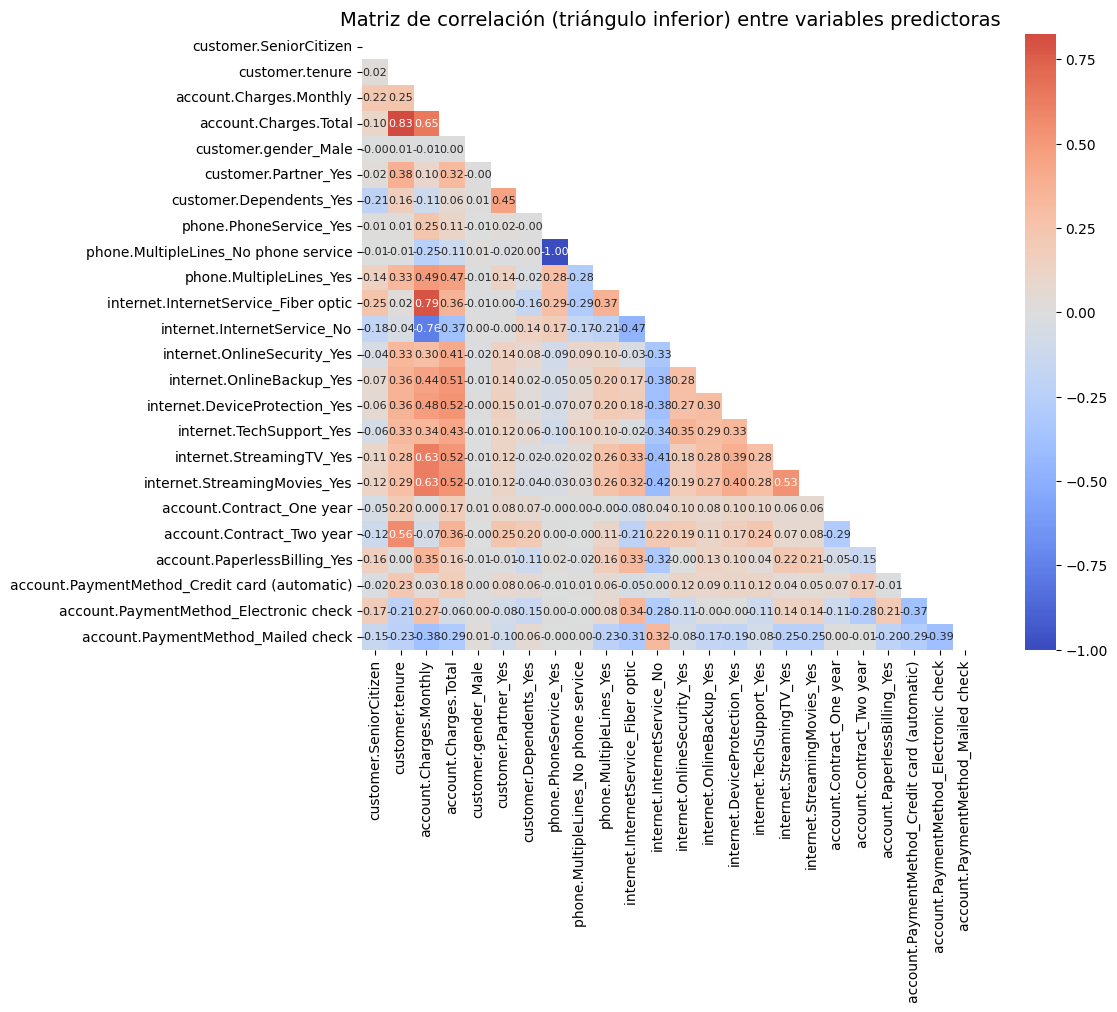

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación entre predictoras (sin el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr = predictoras.corr()

# Máscara para ocultar el triángulo superior (incluye diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,           # ✅ solo triángulo inferior
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 8},
    square=True,         # ✅ lo deja “cuadrado partido a la mitad”
    cbar=True
)
plt.title("Matriz de correlación (triángulo inferior) entre variables predictoras", fontsize=14)
plt.show()


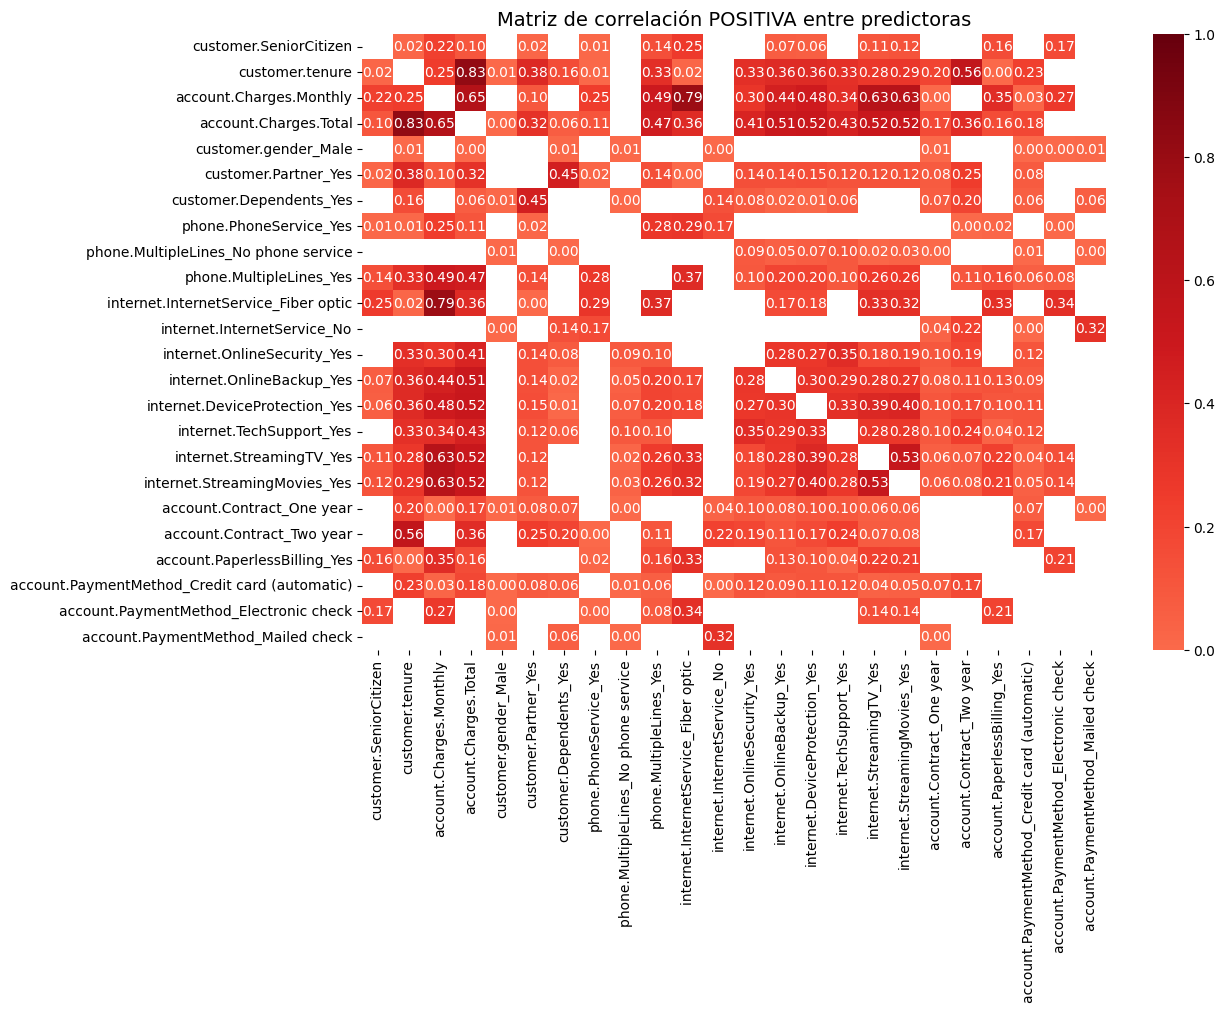

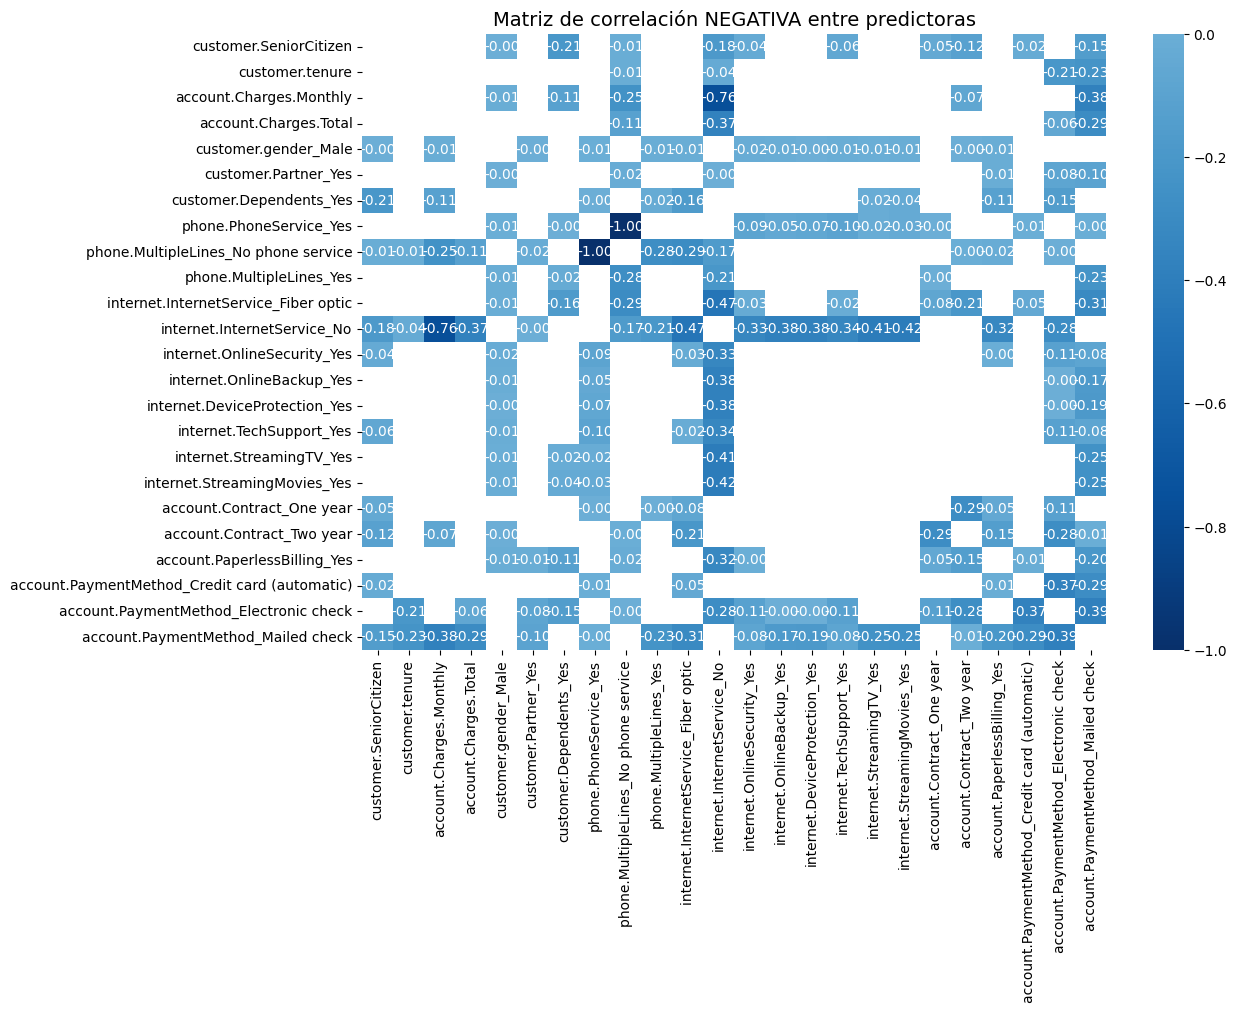

In [38]:
# Matriz de correlación entre predictoras (sin el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr = predictoras.corr().copy()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- POSITIVAS ---
corr_pos = corr.mask(corr <= 0)          # deja solo > 0
np.fill_diagonal(corr_pos.values, np.nan) # ocultar diagonal (opcional)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_pos, cmap="Reds", center=0, annot=True, fmt=".2f",
            vmin=0, vmax=1, cbar=True)
plt.title("Matriz de correlación POSITIVA entre predictoras", fontsize=14)
plt.show()

# --- NEGATIVAS ---
corr_neg = corr.mask(corr >= 0)           # deja solo < 0
np.fill_diagonal(corr_neg.values, np.nan) # ocultar diagonal (opcional)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_neg, cmap="Blues_r", center=0, annot=True, fmt=".2f",
            vmin=-1, vmax=0, cbar=True)
plt.title("Matriz de correlación NEGATIVA entre predictoras", fontsize=14)
plt.show()


**Resumen de correlación entre variables independientes.**
--

**¿Qué significa correlación entre variables?**

* Una correlación mide qué tan parecidas son dos variables en su comportamiento.

* Valores cercanos a +1 → cuando una sube, la otra también sube.

* Valores cercanos a –1 → cuando una sube, la otra baja.

* Valores cercanos a 0 → no hay relación.

**¿Qué buscar en el heatmap?**

* Cuando ves el heatmap de correlación entre todas las variables predictoras (independientes):

* Cada celda es la relación entre dos variables.

* Lo que debes mirar son las celdas con correlación muy alta en valor absoluto.

👉 Eso indica colinealidad → las dos variables están contando prácticamente la misma historia.

> **Importancia:**

> - **Correlación de variables independientes con churn (dependiente):**  dice si la variable aporta para explicar la evasión.

> - **Correlación entre variables independientes:** dice si dos variables cuentan lo mismo (colinealidad).

>**Decisión:**

> * Si dos variables son colineales, manener la que tiene mayor relación con `churn`.
> * La otra es candidata a eliminar, porque solo introducirá ruido sin aportar valor adicional.

👉 Con esta técnica de manera preliminar aseguro de quedarme con las variables relavantes y no redundantes para el modelo.

**Relación positiva entre variables independientes**

> * Relación 0.83 `customer.tenure` con `account.Charges.Total`/Relación con `churn`: `account.Charges.Total` / Recomendación
> * Relación 0.79 `internet.InternetService_Fiber optic` con `account.Charges.Monthly` /Relación con `churn`: `account.Charges.Monthly` /Recomendación
> * Relación 0.65 `account.Charges.Total` con `account.Charges.Monthly` /Relación con `churn`: `account.Charges.Monthly`/ Recomendación
> * Relación 0.63 `internet.StreamingTV_Yes` con `account.Charges.Monthly`  /Relación con `churn`: `account.Charges.Monthly` /Recomendación
> * Relación 0.63 `'internet.StreamingMovies_Yes` con `account.Charges.Monthly` /Relación con `churn`: `account.Charges.Monthly` /Recomendación
> * Relación 0.53 `internet.StreamingMovies_Yes` con `internet.StreamingTV_Yes` /Relación con `churn`: no aparecen en el heatmap con umbral de 0.07 /Recomendación
> * Relación 0.52 `'internet.StreamingMovies_Yes` con `account.Charges.Total` /Relación con `churn`:`account.Charges.Total` /Recomendación
> * Relación 0.52 `internet.StreamingTV_Yes` con `account.Charges.Total` /Relación con `churn`: `account.Charges.Total` /Recomendación
> * Relación 0.52 `internet.OnlineBackup_Yes` con `account.Charges.Total` /Relación con `churn`: `internet.OnlineBackup_Yes`/Recomendación
> * Relación 0.51 `internet.StreamingTV_Yes` con `account.Charges.Total` /Relación con `churn`:`account.Charges.Total` /Recomendación
> * Relación 0.49 `phone.MultipleLines_Yes` con `account.Charges.Monthly` /Relación con `churn`: `account.Charges.Monthly`/Recomendación
> * Relación 0.48 `internet.DeviceProtection_Yes` con `account.Charges.Monthly` /Relación con `churn`: `account.Charges.Monthly` /Recomendación
> * Relación 0.47 `phone.MultipleLines_Yes` con `account.Charges.Total` /Relación con `churn`: `account.Charges.Total` /Recomendación

**Relaciones negativas entre variables independientes.**

> * Relación -1.00 `phone.MultipleLines_Yes` con `phone.MultipleLines_No phone service` /Relación con `churn`: no aparecen en el heatmap con umbral 0.07 /Recomendación
> * Relación -0.76 `account.Charges.Monthly` con `internet.InternetService_No` /Relación con `churn`: `account.Charges.Monthly` /Recomendación
> * Relación -0.47 `internet.InternetService_Fiber optic` con `internet.InternetService_No` /Relación con `churn`: `internet.InternetService_No` /Recomendación

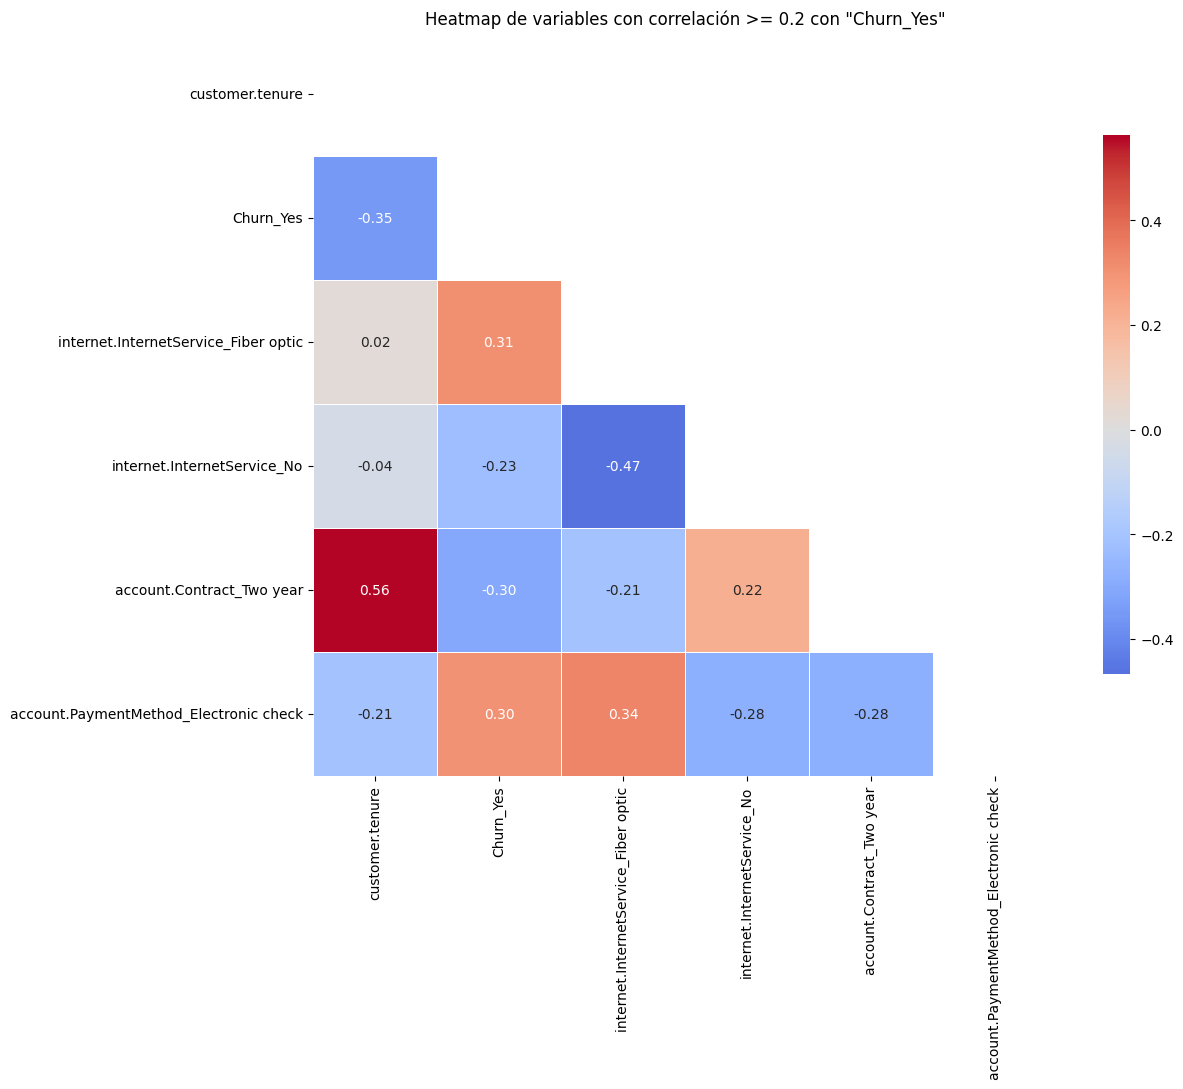

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()



* El mapa representa la matriz de correlación con todas la variables involucradas con correlación absoluta ≥ 0.07 respecto a Churn_Yes, ordenada en forma descendente.

 - Colores rojos → correlación positiva fuerte.

 - Colores azules → correlación negativa fuerte.

 - Valores cercanos a 0 → poca relación.

* Nota.

  El filtro de relación se aplica como herramienta práctica para enfocarnos en relaciones más marcadas de forma individual.

  Se elimina el target para que no aparezca con correlación 1.0.

  A partir de 0.8 se considera una correlación alta.



##**Análisis de Multicoliniaridad.**

1. Importar las bibliotecas necesarias

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Normalización y Estandarización.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_encoding.columns

In [ ]:
#Copia para no modificar datos originales.
df_encoding_copy = df_encoding.copy()

3. Seleccionar las variables independientes.

In [ ]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoding_copy.drop(columns=['Churn_Yes'])

4. Añadir constante (intercepto).

In [ ]:
X_const = add_constant(X)

5. Calcular el VIF.

In [ ]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

Análisis de resultados.

💡 Regla práctica para modelos lineales:

 - <= 1 no existe multicoliniaridad.
 - VIF ≤ 5 → seguro.

 - 5 < VIF ≤ 10 → revisar, pero podría usarse.

 - VIF > 10 → alto riesgo → evaluar eliminar o transformar.


 - INF significa infinito y se interpreta como colinealidad perfecta. Una variable está perfectamente explicada por una o más variables del conjunto.
 En otras palabras esa variables es una combinación lineal exacta de otras. Y eso se traduce que hemos introducido 2 variables que en realidad contienen la misma información. Puede que esté duplicada o que una variable se calcula a partir de otra.

 ¿Qué hacer?
 - Debemos buscar el par de variables que que están duplicando la información.
 - Elimiar una de las variables redundantes.
 - Si es por variable dummy aplicar drop_first= True en pd.get_dummies()

**OJO**

Un VIF alto indica que el modelo podría tener problemas para estimar correctamente los coeficientes, porque esa variable está “inflando” la varianza debido a su redundancia con otras.

No siempre es malo si se usan modelos no lineales (árboles, random forest, XGBoost), porque estos modelos no asumen independencia entre predictores.

Pero si tu objetivo es interpretar coeficientes o usas un modelo lineal, sí conviene manejarlo.